In [1]:
from scipy.cluster.hierarchy import dendrogram
from backend import *
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
splits, mapping = parse_file("data.txt")
linkage_matrix: Matrix = construct_linkage_matrix(splits, mapping)

In [3]:
indices = pd.DataFrame([[clade, index] for clade, index in mapping.items()])
indices.columns = ["Clade/Species", "Index"]
indices = indices.set_index("Index").T

In [4]:
def process(row: Vector) -> list[int | float]:
    data: list[int | float] = []
    for index, entry in enumerate(row):
        data.append(float(entry) if index == 2 else int(entry))
    return data

assert len(splits) == len(linkage_matrix)

for i in range(len(splits)):
    print(f"{splits[i]}\n{process(linkage_matrix[i])}\n")

indices

D -> Brown Bear, Polar Bear (0.9)
[0, 1, 0.9, 2]

B -> American Black Bear, D (3.4)
[2, 8, 3.4, 3]

E -> Sun Bear, Sloth Bear (3.6)
[3, 4, 3.6, 2]

C -> Asiatic Black Bear, E (4.4)
[5, 10, 4.4, 3]

Ursinae -> B, C (5.0)
[9, 11, 5.0, 6]

A -> Spectacled Bear, Ursinae (10.6)
[6, 12, 10.6, 7]

Ursidae -> Giant Panda, A (19.0)
[7, 13, 19.0, 8]



Index,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
Clade/Species,Brown Bear,Polar Bear,American Black Bear,Sun Bear,Sloth Bear,Asiatic Black Bear,Spectacled Bear,Giant Panda,D,B,E,C,Ursinae,A,Ursidae


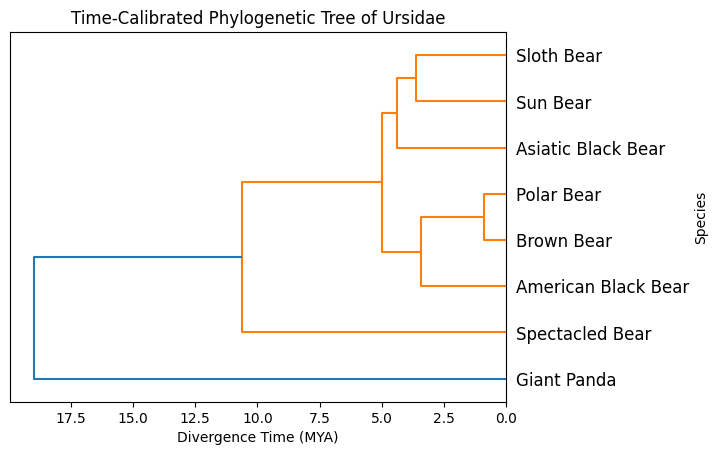

In [5]:
plot_dendrogram(linkage_matrix, mapping)